# Первичный анализ данных

In [70]:
import pandas as pd
sho = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/task8/customer_data_with_churn.csv')
shop = pd.concat([sho], keys=['CustomerID'])
shop.head()

CustomerID              Name  Age  Gender  Annual_Income  \
CustomerID 0   CUST1000    Connor Rowland   40  Female          52777   
           1   CUST1001  Cameron Miles MD   28  Female          65910   
           2   CUST1002      Dennis Price   63    Male          56731   
           3   CUST1003     Jessica Jones   23  Female          40559   
           4   CUST1004       Kevin Bauer   38    Male          79675   

              Spending_Score Membership_Level  Purchase_Frequency  \
CustomerID 0              27             Gold                 5.2   
           1              84            Basic                12.2   
           2              51           Silver                 2.9   
           3              56         Platinum                11.1   
           4              74            Basic                10.7   

              Churn_Status  
CustomerID 0             0  
           1             0  
           2             1  
           3             0  
           4             0

In [71]:
shop.tail()

CustomerID                  Name  Age  Gender  Annual_Income  \
CustomerID 1995   CUST2995  Dr. Gina Ferguson MD   20    Male          62280   
           1996   CUST2996        Jessica Nelson   30    Male          49876   
           1997   CUST2997              Joy Cruz   35  Female          76229   
           1998   CUST2998         Kelly Mendoza   67    Male          40169   
           1999   CUST2999            David Bell   37    Male          42671   

                 Spending_Score Membership_Level  Purchase_Frequency  \
CustomerID 1995              37            Basic                12.4   
           1996              91            Basic                 6.8   
           1997              70           Silver                12.7   
           1998              40            Basic                14.0   
           1999              82             Gold                 8.0   

                 Churn_Status  
CustomerID 1995             0  
           1996             0  
           1997             0  
           1998             1  
           1999             0

In [72]:
shop.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Annual_Income',
       'Spending_Score', 'Membership_Level', 'Purchase_Frequency',
       'Churn_Status'],
      dtype='object')

In [73]:
shop.shape

(2000, 9)

In [74]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2000 entries, ('CustomerID', 0) to ('CustomerID', 1999)
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          2000 non-null   object 
 1   Name                2000 non-null   object 
 2   Age                 2000 non-null   int64  
 3   Gender              2000 non-null   object 
 4   Annual_Income       2000 non-null   int64  
 5   Spending_Score      2000 non-null   int64  
 6   Membership_Level    2000 non-null   object 
 7   Purchase_Frequency  2000 non-null   float64
 8   Churn_Status        2000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 146.8+ KB


In [75]:
shop.describe()

,Age,Annual_Income,Spending_Score,Purchase_Frequency,Churn_Status
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.57150,59849.506000,50.469500,8.000450,0.332500
std,15.13137,14451.507584,29.059289,3.987447,0.471227
min,18.00000,9857.000000,1.000000,1.000000,0.000000
25%,30.00000,49818.500000,25.000000,4.600000,0.000000
50%,43.00000,60036.500000,51.000000,8.000000,0.000000
75%,57.00000,69631.500000,76.000000,11.500000,1.000000
max,69.00000,110053.000000,100.000000,15.000000,1.000000


смысла в дополнительной очистке данных нет

# анализ EDA

In [76]:
print(shop['Churn_Status'].value_counts())

Churn_Status
0    1335
1     665
Name: count, dtype: int64


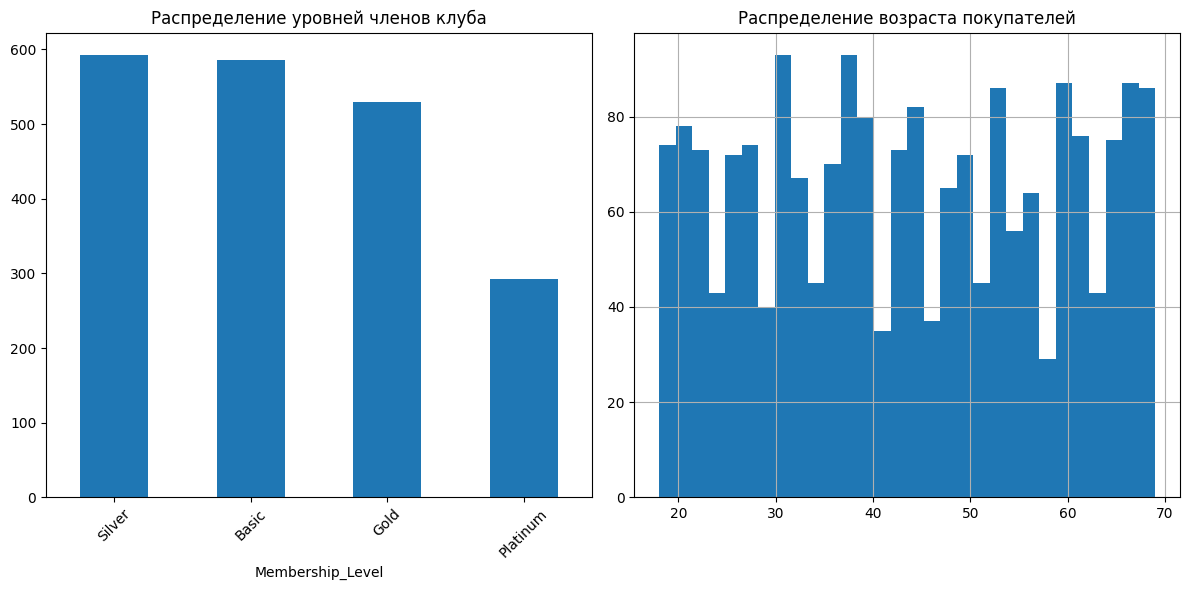

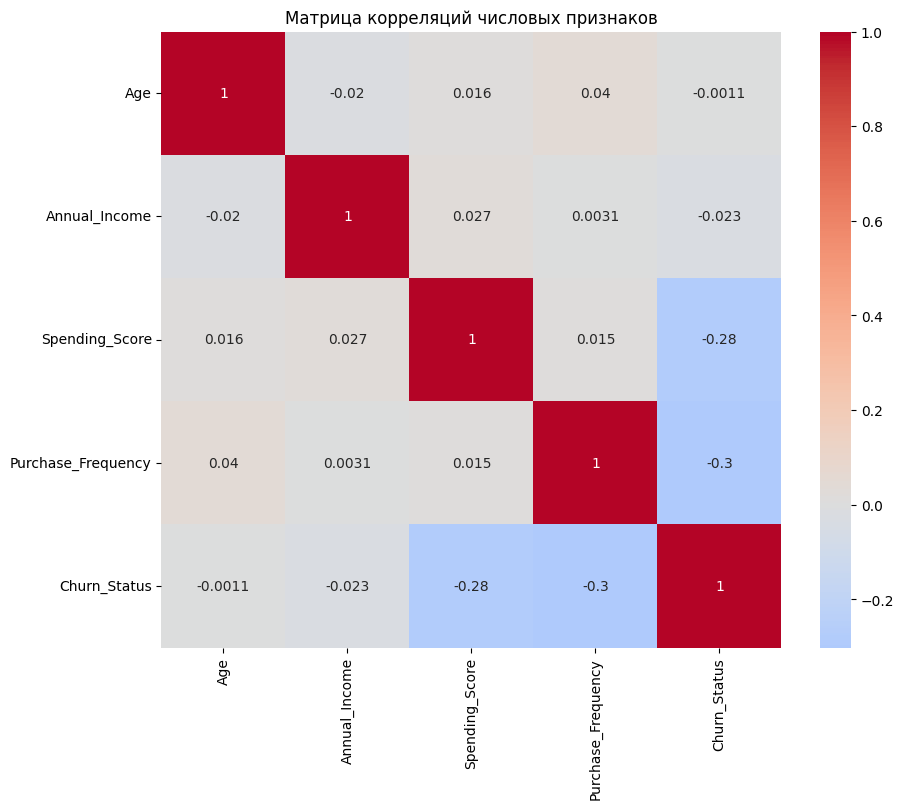

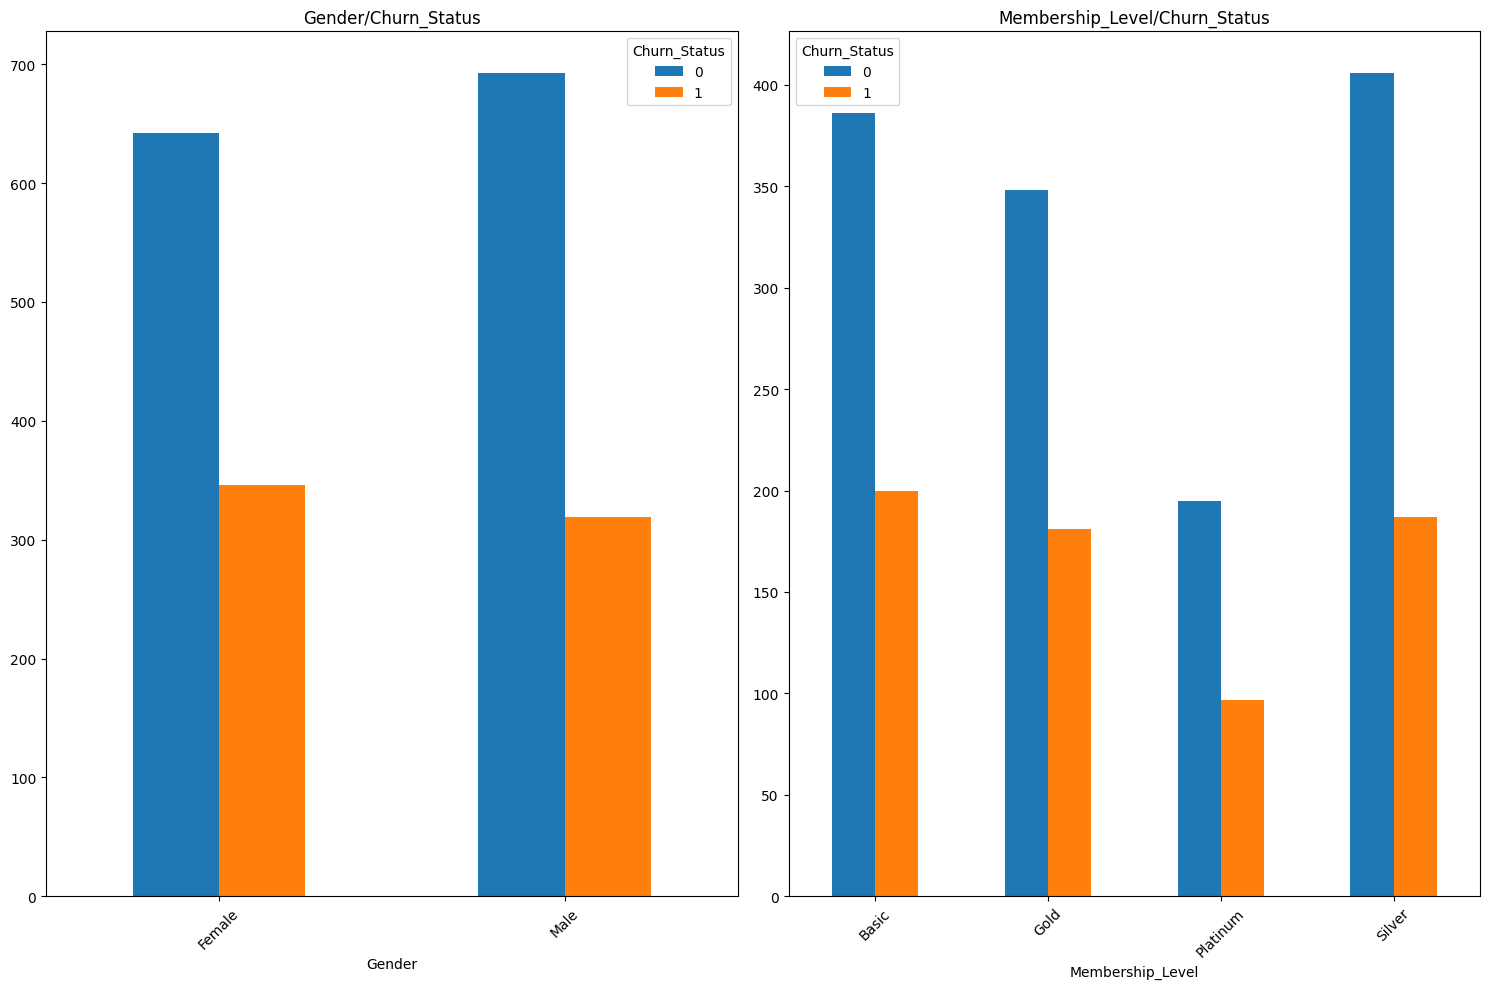

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
shop['Membership_Level'].value_counts().plot(kind='bar')
plt.title('Распределение уровней членов клуба')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
shop['Age'] = pd.to_numeric(shop['Age'], errors='coerce')
if 'Age' in shop.columns:
    shop['Age'].hist(bins=30)
    plt.title('Распределение возраста покупателей')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
numby = shop.select_dtypes(include=[np.number])
if len(numby.columns) > 1:
    sns.heatmap(numby.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Матрица корреляций числовых признаков')
    plt.show()

cat_feet = ['Gender', 'Membership_Level']
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.ravel()

for i, foot in enumerate(cat_feet):
    if foot in shop.columns:
        pd.crosstab(shop[foot], shop['Churn_Status']).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{foot}/Churn_Status')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

делать Feature Engineering также нет смысла

 # 1 - Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания для библиотечных реализаций (например, из sklearn) четырёх регрессионных методов.


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
cat_col = shop.select_dtypes(include=['object']).columns
for col in cat_col:
    labs = LabelEncoder()
    shop[col] = labs.fit_transform(shop[col].astype(str))
    label_encoders[col] = labs

y = shop['Churn_Status'].values
X = shop.drop('Churn_Status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_ts = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1600, 8)
(400, 8)


реализуем Random Forest

In [79]:
import time
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

start = time.time()

forest = RandomForestRegressor(random_state=42)
para_forest = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_forest = GridSearchCV(forest, para_forest, cv=3)
grid_forest.fit(X_train, y_train)

best_forest = grid_forest.best_estimator_
y_pred_fk = best_forest.predict(X_test)
r2_fk = r2_score(y_test, y_pred_fk)
time_fk = time.time() - start

print(f"Время: {time_fk:.1f} сек, R2: {r2_fk:.3f}")
print(f"Лучшие параметры: {grid_forest.best_params_}")

Время: 14.4 сек, R2: 0.209
Лучшие параметры: {'max_depth': 10, 'n_estimators': 200}


реализация Gradient Boosting

In [80]:
start = time.time()

booster = GradientBoostingRegressor(random_state=42)
para_boo = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.2]}
grid_boo = GridSearchCV(booster, para_boo, cv=3)
grid_boo.fit(X_train, y_train)

best_boom = grid_boo.best_estimator_
y_pred_boo = best_boom.predict(X_test)
r2_boo = r2_score(y_test, y_pred_boo)
time_boo = time.time() - start

print(f"Время: {time_boo} сек, R2: {r2_boo}")
print(f"Лучшие параметры: {grid_boo.best_params_}")

Время: 6.983770847320557 сек, R2: 0.22566597005494138
Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 100}


реализация Ridge Regression

In [81]:
from sklearn.linear_model import Ridge

start = time.time()
bridge = Ridge(random_state=42)
para_bridge = {'alpha': [0.1, 1.0, 10.0]}
grid_bridge = GridSearchCV(bridge, para_bridge, cv=3)
grid_bridge.fit(X_train, y_train)

best_bridge = grid_bridge.best_estimator_
y_pred_bridge = best_bridge.predict(X_test)
r2_bridge = r2_score(y_test, y_pred_bridge)
time_bridge = time.time() - start

print(f"Время: {time_bridge} сек, R2: {r2_bridge}")
print(f"Лучшие параметры: {grid_bridge.best_params_}")

Время: 0.0560152530670166 сек, R2: 0.154016698032704
Лучшие параметры: {'alpha': 10.0}


реализация Lasso

In [82]:
from sklearn.linear_model import Lasso

start = time.time()

lasso = Lasso(random_state=42)
para_lasso = {'alpha': [0.1, 1.0, 10.0]}
grid_lassy = GridSearchCV(lasso, para_lasso, cv=3)
grid_lassy.fit(X_train, y_train)

best_lasso = grid_lassy.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
time_lasso = time.time() - start

print(f"Время: {time_lasso} сек, R2: {r2_lasso}")
print(f"Лучшие параметры: {grid_lassy.best_params_}")

Время: 0.06587600708007812 сек, R2: 0.15763468271725922
Лучшие параметры: {'alpha': 0.1}


Cравникаем

In [83]:
results = {
    'Random Forest': {'model': best_forest, 'r2': r2_fk, 'time': time_fk},
    'Gradient Boosting': {'model': best_boom, 'r2': r2_boo, 'time': time_boo},
    'Ridge': {'model': best_bridge, 'r2': r2_bridge, 'time': time_bridge},
    'SVR': {'model': lasso, 'r2': r2_lasso, 'time': time_lasso}
}

comparison = []
for name, res in results.items():
    comparison.append({'Модель': name,'R2': res['r2'],'Время обучения (сек)': res['time']})

df_comparison = pd.DataFrame(comparison)
print(df_comparison.to_string(index=False))

           Модель       R2  Время обучения (сек)
    Random Forest 0.208990             14.388342
Gradient Boosting 0.225666              6.983771
            Ridge 0.154017              0.056015
              SVR 0.157635              0.065876
